In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import pymc3 as pm

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [2]:
from matplotlib import figure

In [3]:
# import scipy.io

In [4]:
path = 'datos/'
fileName = 'SAOCOM_Chubut_C3_TesisNaty_agrupadas_corregidas_chequeada.csv'

In [5]:
rho_lenga = 930 # [kg/m3] Nothofagus pumilio
rho_nire = 1035 # [kg/m3] Nothofagus antarctica

In [6]:

# C11 = mat['C11mn']#, 'C11std', 
# C12 = 1j*mat['C12imn'] + mat['C12rmn'], #'C12istd','C12rstd', 
# C13 = 1j*mat['C13imn'] + mat['C13rmn'], #'C13istd', 'C13rstd', 
# C22 = mat['C22mn'] #'C22std', 
# C23 = 1j*mat['C23imn'] + mat['C23rmn'], # 'C23istd',  'C23rstd', 
# C33 = mat['C33mn'] #, 'C33std'
# C21 = np.conjugate(C12)
# C31 = np.conjugate(C13)
# C32 = np.conjugate(C23)
# C = np.asarray([[C11, C12, C12], [C21, C22, C23], [C31, C32, C33]])

def dB(x):
    return 10*np.log10(x)

def toPower(x):
    return 10**(x/10)

def anotattedScatter(df, col1, col2):
    ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('O')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')  

def anotattedBubbleScatter(df, col1, col2, col3):
    ax1 = df.plot.scatter(x=col1,y=col2, s=col3, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('O')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey') 

def errorBarPlot(df, col1, col2, col2_std):
    # print(col1, col2, col2_std)
    pos, neg = errorBarL(df, col2, col2_std)
    # print(pos, neg)
    ax1 = df.plot.scatter(x=col1,y=col2, yerr=(pos, neg), alpha=0.7, figsize=(20, 12), grid=True)

    # ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('O')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')


def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
        
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

        # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
        # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
        # df[mean+'_pos'] = pos 
        # df[mean+'_neg'] = neg 
    return pos, neg

    # for mean, std in zip(colListMean, colListStd):
    #     # print(mean, std)
        
    #     pos = np.abs(dB(1 + (df[std]/df[mean])))
    #     neg = np.abs(dB(1 - (df[std]/df[mean])))

    #     # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
    #     # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
    #     # df[mean+'_pos'] = pos 
    #     # df[mean+'_neg'] = neg 
    #     return pos, neg

In [7]:
data = pd.read_csv(path+fileName, encoding='latin', delimiter = ',') #'\t'

In [8]:
data.head()

,NAME,FECHA,LAYER,TIPO_FORES,SUP_m2,Alt Dom,AB,Vol m3/ha Ã±ire,Vol m3/ha total,manejo,...,VV (gamma0),VV (beta0),VH.1,VH (gamma0),VH (beta0),VV_std.1,VH_std.1,LIA.1,PLIA.1,IAE.1
0,CENTRO13,2018/11/26,parcela 13_14,ÃIRE,200,5.3,8.0,26.0,26.0,TESTIGO,...,0.2024,0.2453,0.0278,0.0361,0.0438,0.0055,0.0001,35.19,35.17,39.58
1,CENTRO14,2018/11/26,parcela 13_14,ÃIRE,200,4.2,11.0,30.0,30.0,RALEO,...,0.1806,0.2189,0.0254,0.0330,0.0400,0.0031,0.0002,35.07,34.60,39.58
2,CENTRO16,2018/11/27,parcela 15_16,ÃIRE,200,4.0,9.0,22.0,22.0,RALEO,...,0.1253,0.1519,0.0224,0.0290,0.0352,0.0030,0.0014,40.77,40.45,39.58
3,CENTRO15,2018/11/27,parcela 15_16,ÃIRE,200,4.6,7.0,21.0,21.0,TESTIGO,...,0.1364,0.1654,0.0228,0.0295,0.0358,0.0046,0.0000,35.28,35.24,39.58
4,CENTRO17,2019/01/21,parcela 17_18,ÃIRE,200,4.0,20.0,58.0,58.0,RALEO,...,0.1423,0.1725,0.0273,0.0354,0.0429,0.0053,0.0014,37.12,35.77,39.58


In [9]:
data.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha Ã±ire', 'Vol m3/ha total', 'manejo', 'C11', 'C12r', 'C12i',
       'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std',
       'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std',
       'C23i_std', 'C33_std', 'ang_std', 'LIA', 'PLIA', 'IAE', 'Nr Pix',
       'NDVI', 'VV', 'VH', 'ang.1', 'VV_std', 'VH_std', 'ang_std.1', 'VV.1',
       'VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)', 'VH (beta0)',
       'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1', 'IAE.1'],
      dtype='object')

In [10]:
# calculo biomasa
data['AGB'] = data['Vol m3/ha total']*rho_nire/1000

In [11]:
# extraigo dataFrame SAOCOM

dataSAOCOM = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha Ã±ire', 'Vol m3/ha total', 'AGB', 'manejo', 'C11', 'C12r', 'C12i',
       'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std',
       'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std',
       'C23i_std', 'C33_std', 'ang_std', 'LIA', 'PLIA', 'IAE', 'Nr Pix']].copy(deep=True)

In [12]:
# extraigo dataFrame Sentinel

dataSentinelAsc = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha total', 'AGB', 'VV', 'VH', 'ang.1', 'VV_std', 'VH_std', 'ang_std.1']].copy(deep=True)

In [13]:
# extraigo dataFrame Sentinel

dataSentinelDes = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha total', 'AGB', 'VV.1','VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)', 'VH (beta0)',
       'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1', 'IAE.1']].copy(deep=True)

In [14]:
del data

In [15]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
# dataSentinelAsc['AGB'] = dataSentinelAsc['Vol m3/ha total']*rho_nire/1000

In [16]:
dataSentinelDes.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha total', 'AGB', 'VV.1', 'VV (gamma0)', 'VV (beta0)', 'VH.1',
       'VH (gamma0)', 'VH (beta0)', 'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1',
       'IAE.1'],
      dtype='object')

In [17]:
# normalizacion angulo Sentinel
# 'corrijo' por angulo de incidencia

toAnalize = ['VV.1', 'VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)','VH (beta0)']
angSentinel = 'LIA.1'

def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSentinelDes, toAnalize, angSentinel, '_corr')

In [18]:
# normalizacion angulo SAOCOM
# 'corrijo' por angulo de incidencia

toAnalize =  ['C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33']

angSAOCOM = 'LIA'


def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSAOCOM, toAnalize, angSAOCOM, '_corr')

In [19]:
dataSentinelDes.head()

,NAME,FECHA,LAYER,TIPO_FORES,SUP_m2,Alt Dom,AB,Vol m3/ha total,AGB,VV.1,...,VH_std.1,LIA.1,PLIA.1,IAE.1,VV.1_corr,VV (gamma0)_corr,VV (beta0)_corr,VH.1_corr,VH (gamma0)_corr,VH (beta0)_corr
0,CENTRO13,2018/11/26,parcela 13_14,ÃIRE,200,5.3,8.0,26.0,26.910,0.1561,...,0.0001,35.19,35.17,39.58,0.146320,0.189719,0.229932,0.026058,0.033838,0.041056
1,CENTRO14,2018/11/26,parcela 13_14,ÃIRE,200,4.2,11.0,30.0,31.050,0.1393,...,0.0002,35.07,34.60,39.58,0.130380,0.169036,0.204884,0.023774,0.030887,0.037439
2,CENTRO16,2018/11/27,parcela 15_16,ÃIRE,200,4.0,9.0,22.0,22.770,0.0967,...,0.0014,40.77,40.45,39.58,0.097812,0.126741,0.153646,0.022658,0.029333,0.035605
3,CENTRO15,2018/11/27,parcela 15_16,ÃIRE,200,4.6,7.0,21.0,21.735,0.1052,...,0.0000,35.28,35.24,39.58,0.098719,0.127996,0.155210,0.021395,0.027682,0.033594
4,CENTRO17,2019/01/21,parcela 17_18,ÃIRE,200,4.0,20.0,58.0,60.030,0.1098,...,0.0014,37.12,35.77,39.58,0.105486,0.136709,0.165722,0.026227,0.034009,0.041214


In [20]:
dataSAOCOM.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha Ã±ire', 'Vol m3/ha total', 'AGB', 'manejo', 'C11', 'C12r',
       'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std',
       'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std',
       'C23i_std', 'C33_std', 'ang_std', 'LIA', 'PLIA', 'IAE', 'Nr Pix',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr'],
      dtype='object')

In [21]:
# largo barras de error

# toErrorBarMean = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
# toErrorBarStd = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']


# def errorBarL(df, colListMean, colListStd):
#     for mean, std in zip(colListMean, colListStd):
        
#         pos = np.abs(dB(1 + (df[std]/df[mean])))
#         neg = np.abs(dB(1 - (df[std]/df[mean])))

#         # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
#         # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
#         df[mean+'_pos'] = pos 
#         df[mean+'_neg'] = neg 
        
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

In [22]:
# paso a dB Sentinel
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSentinel = ['VV.1', 'VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)','VH (beta0)']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSentinelDes, toDBSentinel, '_dB')

In [23]:
# paso a dB SAOCOM
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSAOCOM = ['C11_corr', 'C22_corr', 'C33_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSAOCOM, toDBSAOCOM, '_dB')

In [24]:
dataSentinelDes.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha total', 'AGB', 'VV.1', 'VV (gamma0)', 'VV (beta0)', 'VH.1',
       'VH (gamma0)', 'VH (beta0)', 'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1',
       'IAE.1', 'VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr',
       'VH.1_corr', 'VH (gamma0)_corr', 'VH (beta0)_corr', 'VV.1_dB',
       'VV (gamma0)_dB', 'VV (beta0)_dB', 'VH.1_dB', 'VH (gamma0)_dB',
       'VH (beta0)_dB'],
      dtype='object')

In [25]:
dataSAOCOM.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha Ã±ire', 'Vol m3/ha total', 'AGB', 'manejo', 'C11', 'C12r',
       'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std',
       'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std',
       'C23i_std', 'C33_std', 'ang_std', 'LIA', 'PLIA', 'IAE', 'Nr Pix',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr', 'C11_corr_dB',
       'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

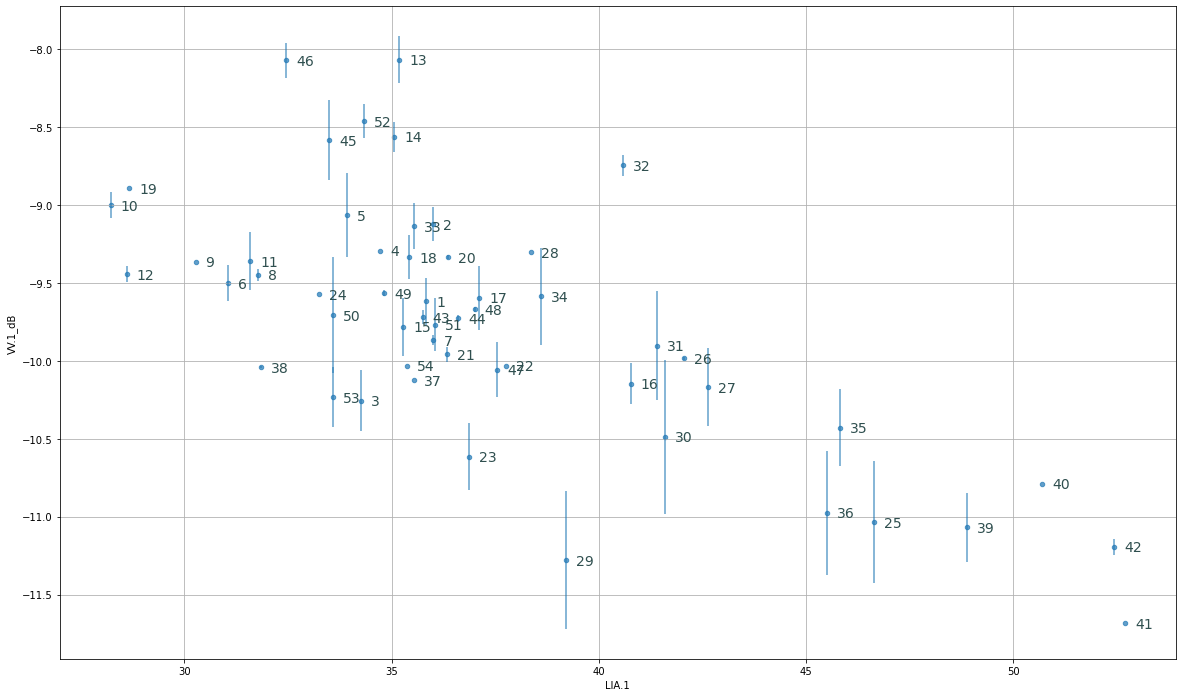

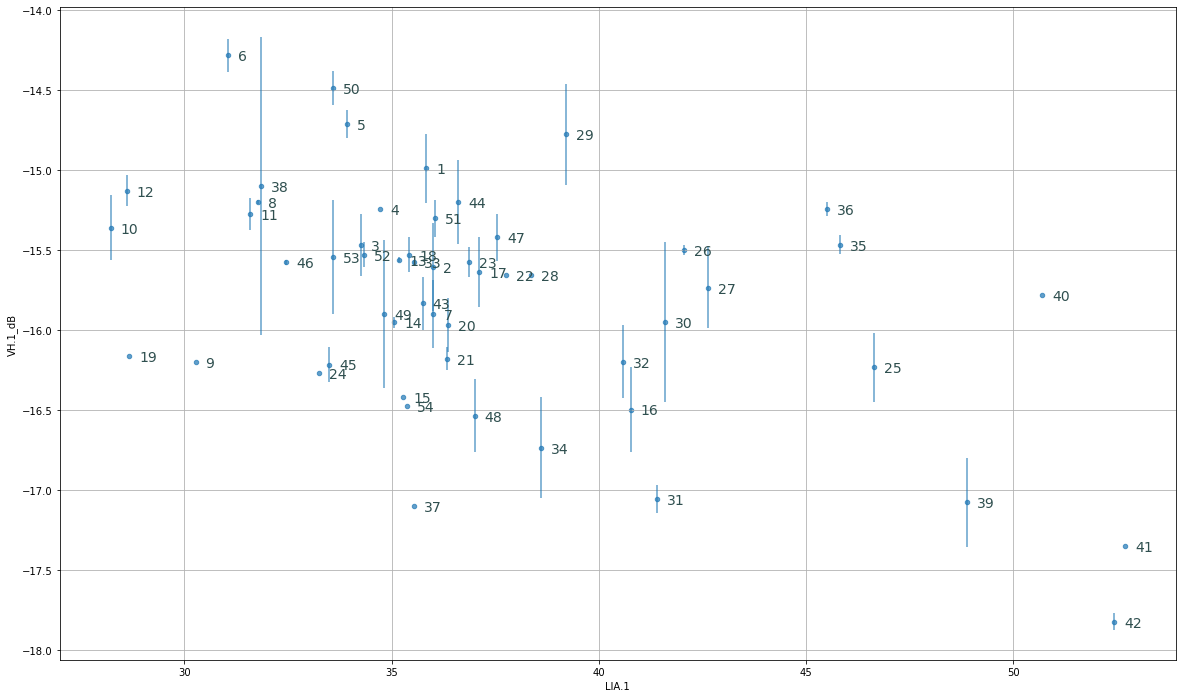

In [26]:
# preliminares Sentinel - estudio angulo de incidencia

toPlot = ['VV.1_dB', 'VH.1_dB']
toPlotStd = ['VV_std.1', 'VH_std.1']

# toPlot = ['VV.1_corr_dB', 'VH.1_corr_dB']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSentinelDes, 'LIA.1', mean, std)

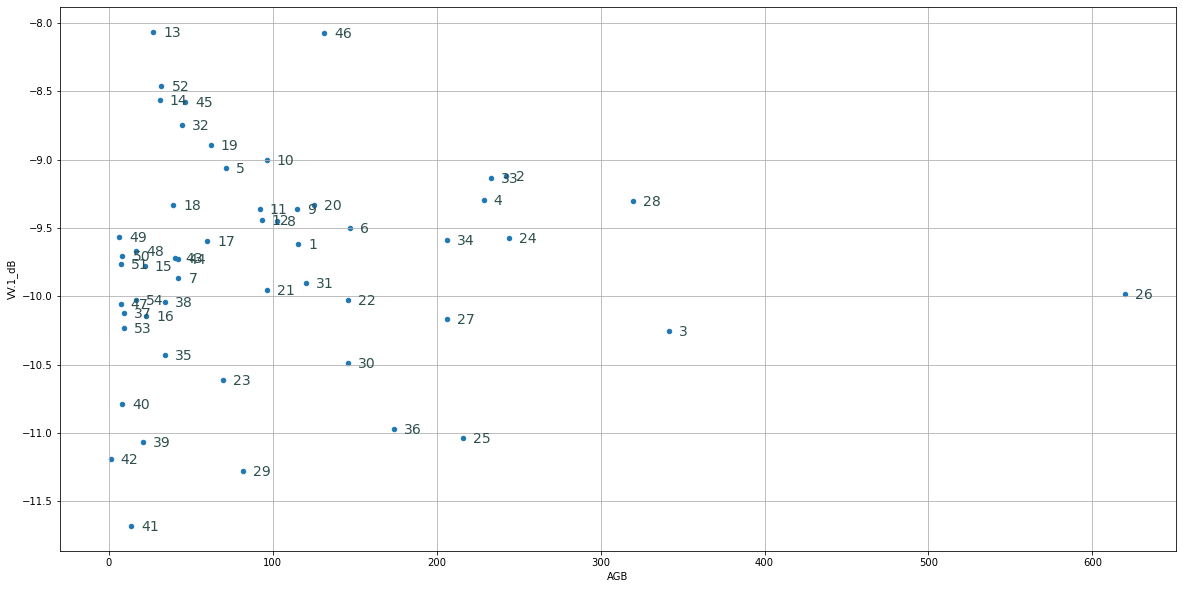

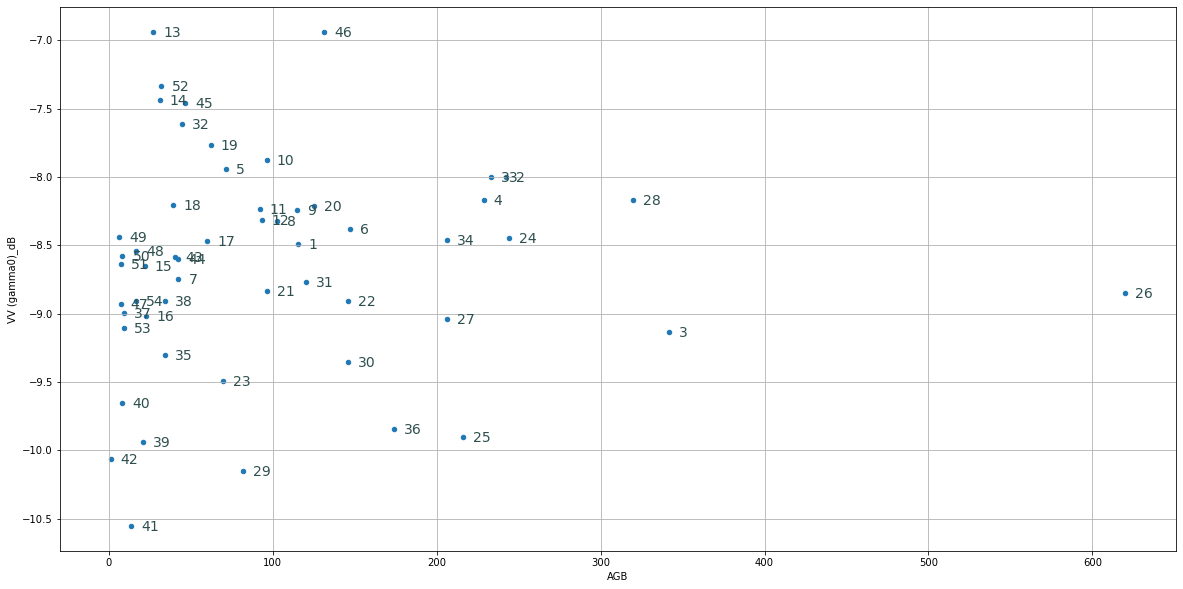

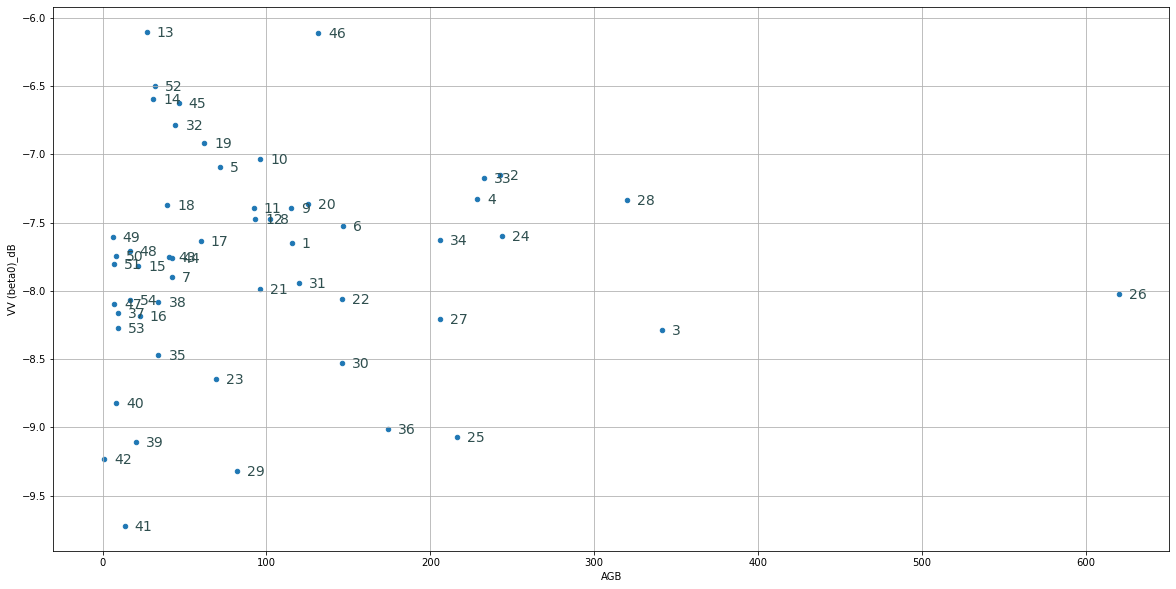

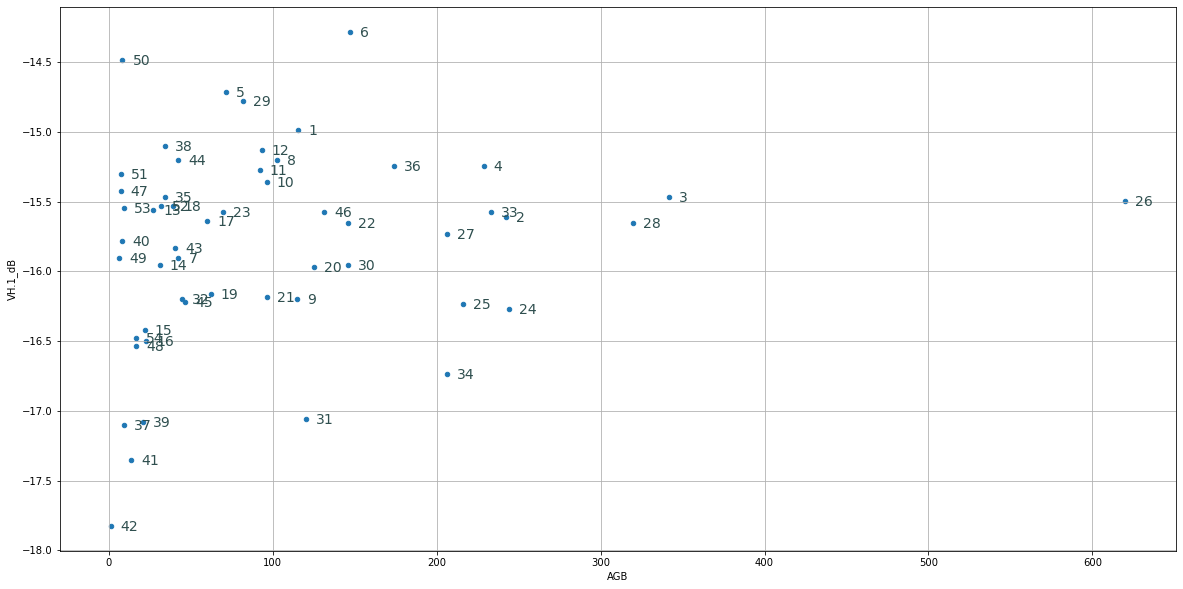

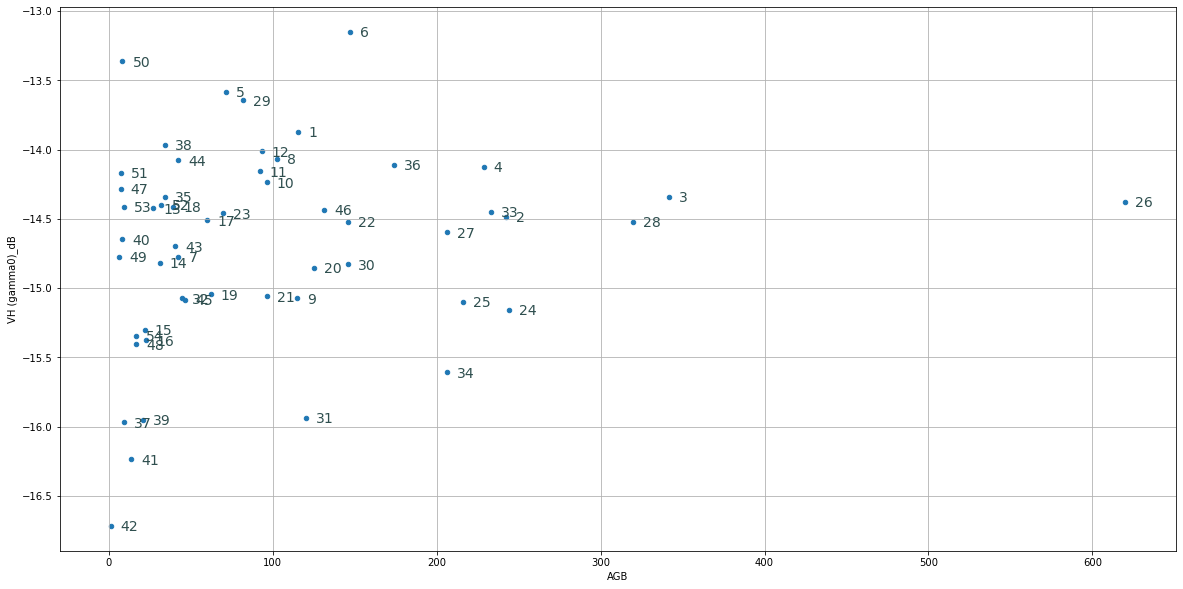

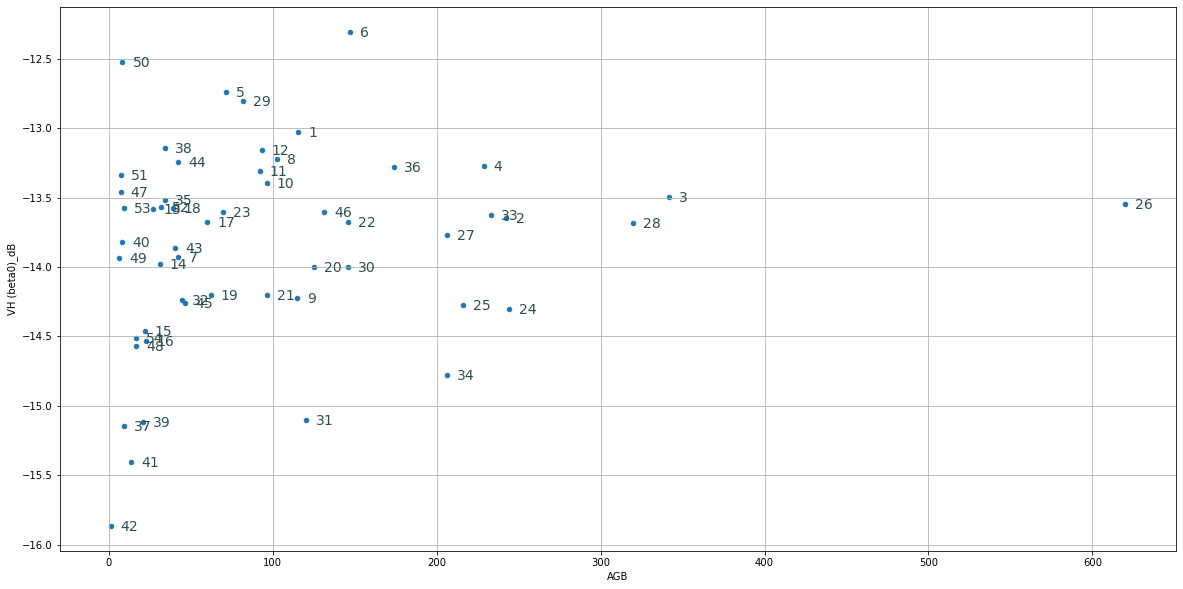

In [27]:
# preliminares Sentinel - estudio Biomasa

toPlot = ['VV.1_dB', 'VV (gamma0)_dB', 'VV (beta0)_dB', 'VH.1_dB', 'VH (gamma0)_dB','VH (beta0)_dB']

for figura in  toPlot:
    anotattedScatter(dataSentinelDes, 'AGB', figura)

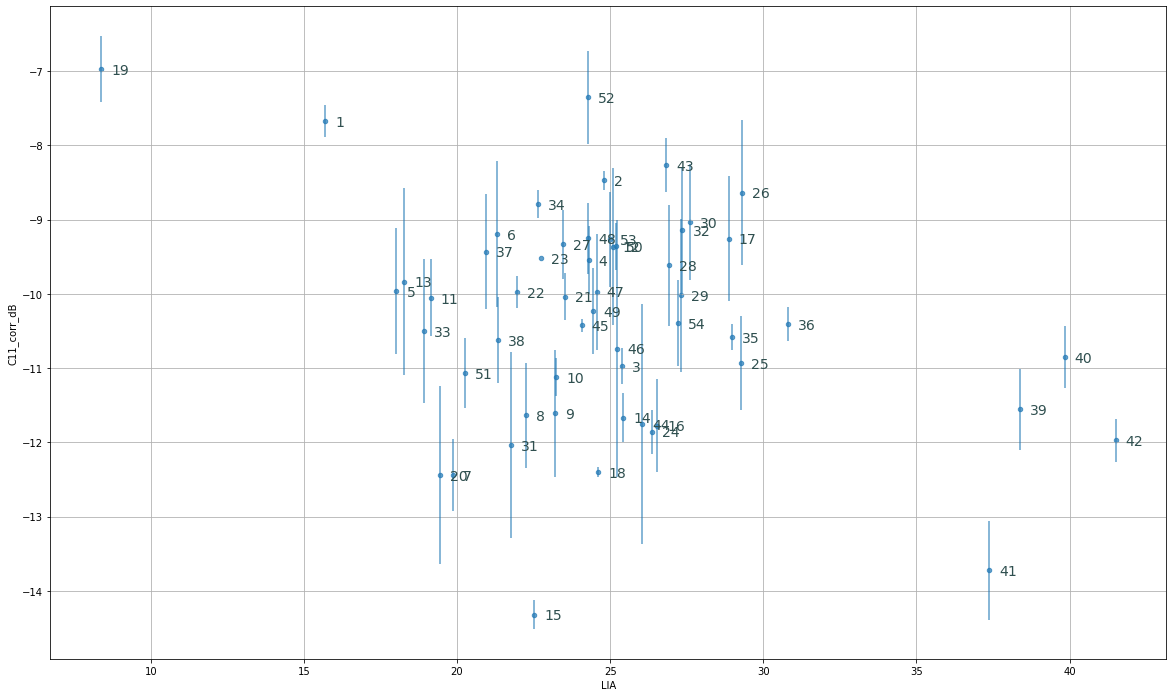

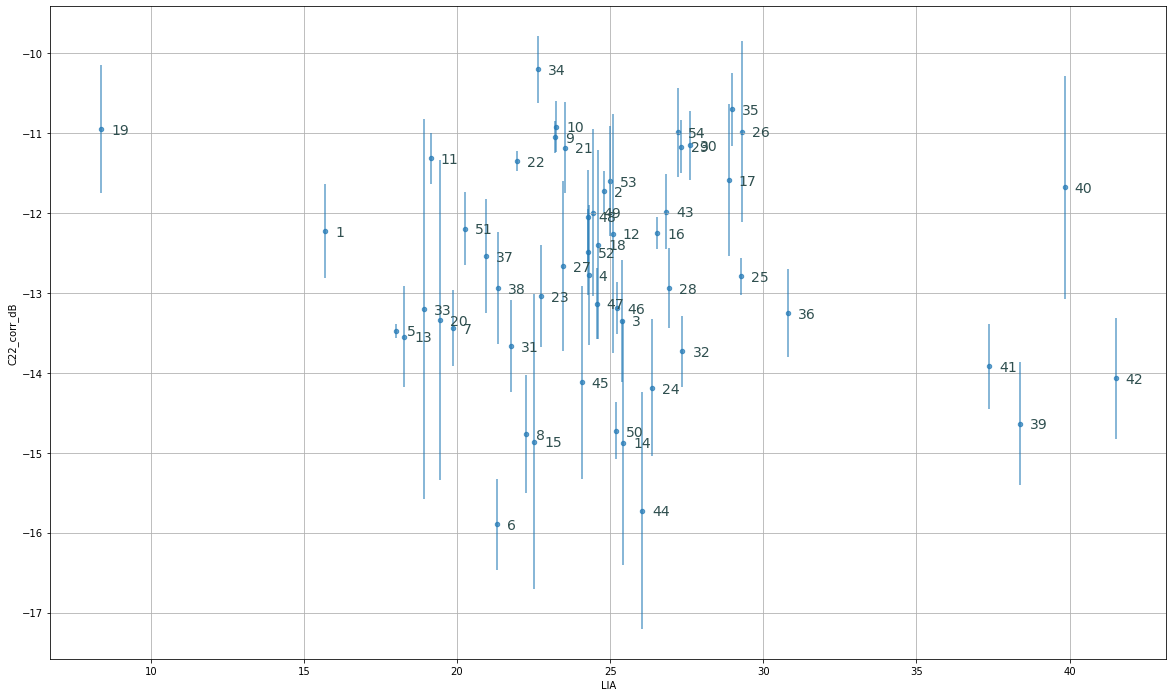

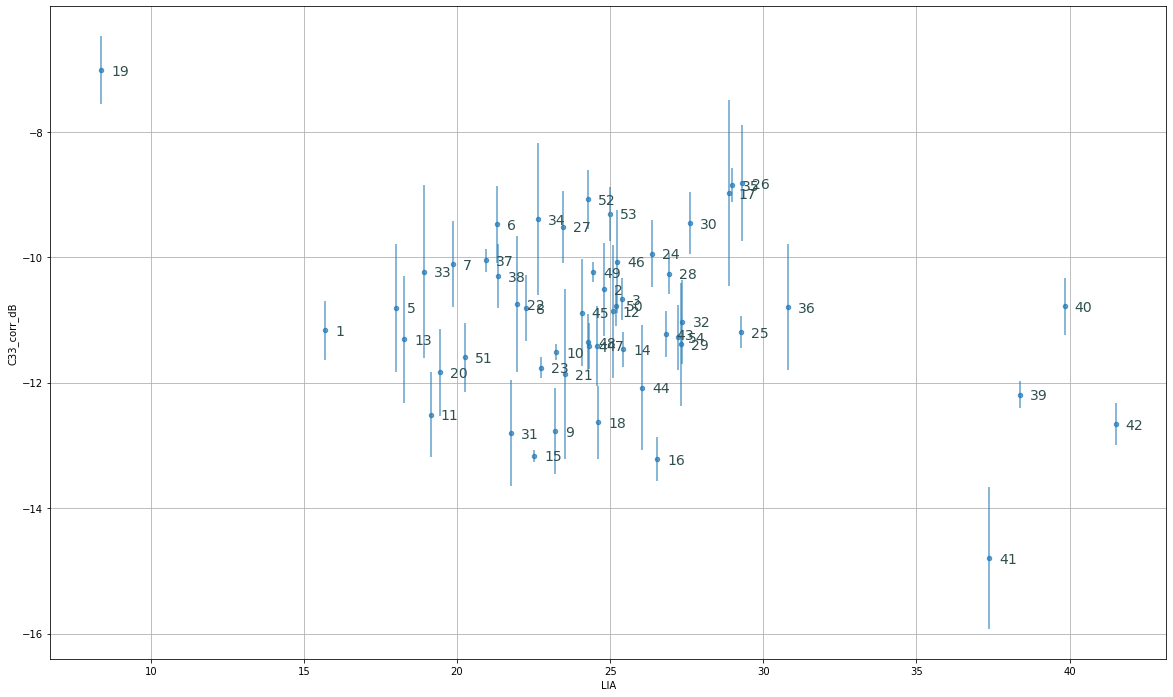

In [28]:
# preliminares SAOCOM - estudio angulo de incidencia

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'LIA', mean, std)

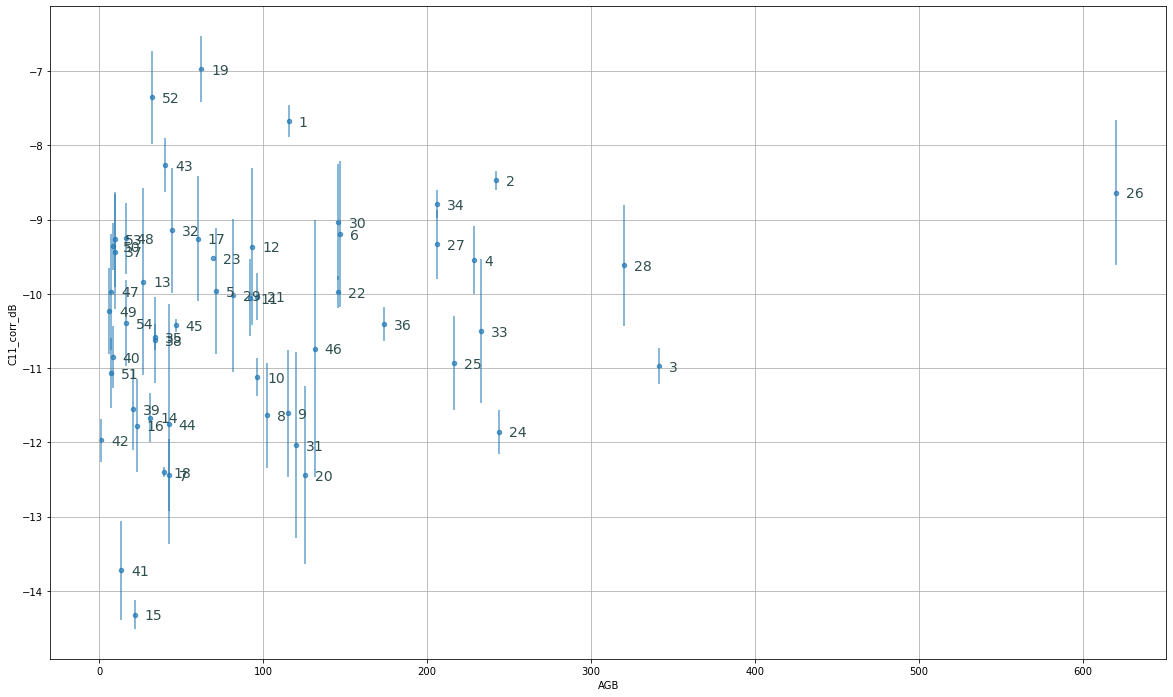

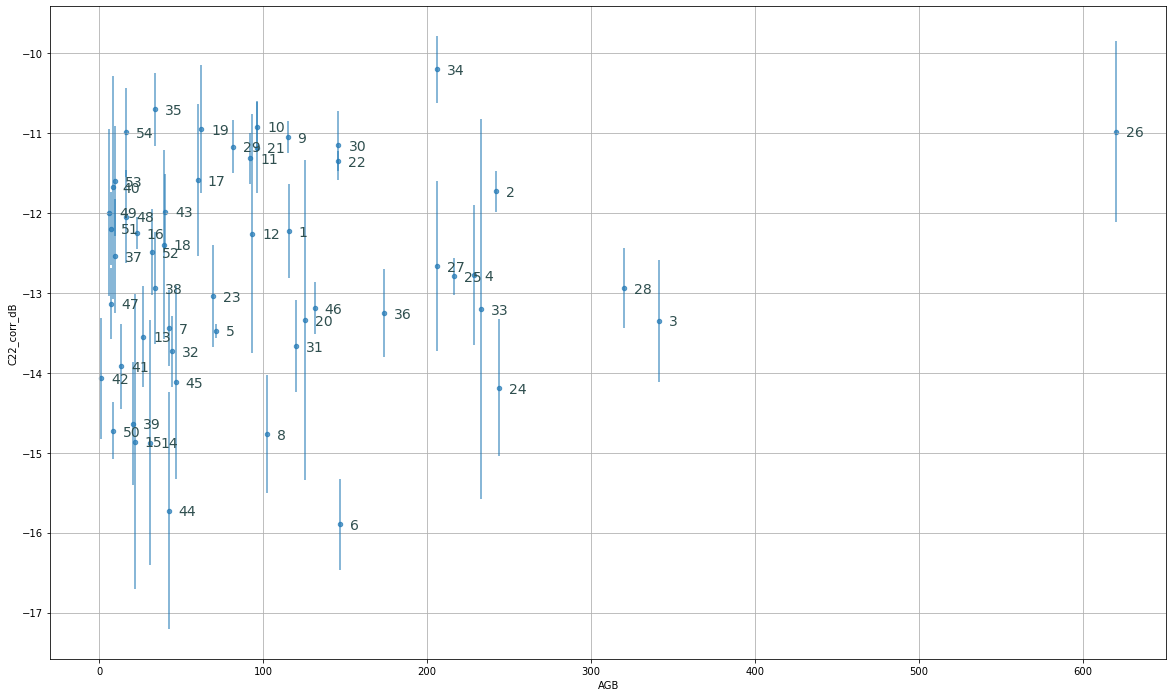

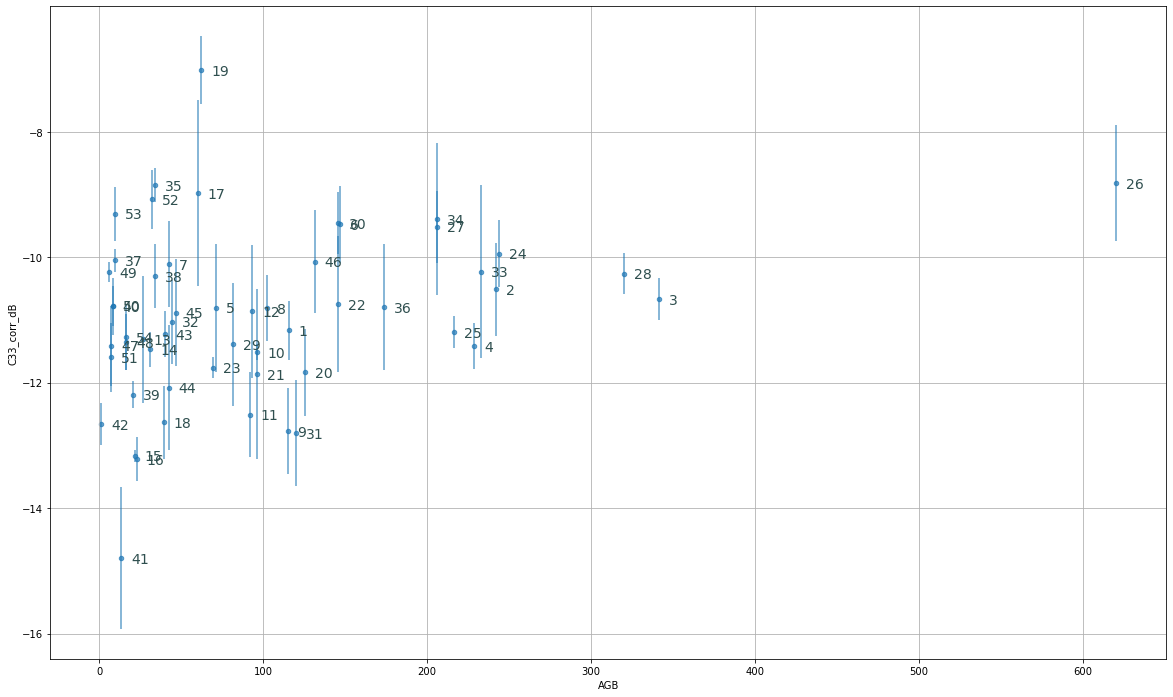

In [29]:
# preliminares SAOCOM - estudio Biomasa

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'AGB', mean, std)

In [30]:
# estudio error

# figure(figsize=(20, 6), dpi=80)

# C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
# C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

# # C11_yerr_pos = 1*np.ones(data_AGB.C11.shape)
# # C11_yerr_neg = 5*np.ones(data_AGB.C11.shape)

# plt.errorbar(data_AGB['NAME'], data_AGB['C11_dB'], yerr=(C11_yerr_neg, C11_yerr_pos))
# # plt.xticks(rotation=90)
# # plt.plot(data_AGB['NAME'], data_AGB['C11_dB'])
# # plt.plot(data_AGB['NAME'], C11_yerr_pos)
# plt.xticks(rotation=90)

In [31]:
# def toProcessGenerator(df):
#     toProcessMean = []
#     toProcessStd = []
#     for col in df.columns:
#         if '_dB' in col:
#             toProcessMean.append(col)
#             stdName = col.split('_')[0]+'_std'
#             toProcessStd.append(stdName)

#     return toProcessMean, toProcessStd

In [32]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)

In [33]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = ['C11_corr', 'C22_corr', 'C33_corr'], ['C11_std', 'C22_std', 'C33_std']
# # No hay datos de std para las descending

# toProcessSentinelMean = []
# toProcessSentinelStd = []

In [34]:
# '''
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)
# '''

# errorBarL(data_AGB, toProcessSAOCOMMean, toProcessSAOCOMStd)

In [35]:
# data_AGB[['C11_corr_pos', 'C11_corr_neg']]

In [36]:
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

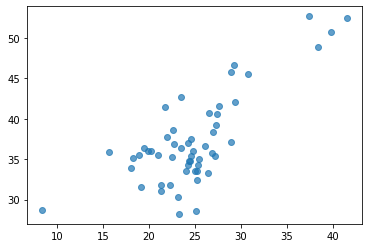

In [37]:
# Estudio angulos SAOCOM vs Sentinel

plt.scatter(dataSAOCOM.LIA, dataSentinelDes['LIA.1'], alpha=0.7) #figsize=(20, 12), grid=True

# for i, txt in enumerate(data_AGB.NAME):
#    striped = txt.split('O')[1]
#    ax.annotate(striped, (data_AGB['ang.1'][i], data_AGB['ang'][i]), xytext=(10,-5), textcoords='offset points',
#                 family='sans-serif', fontsize=14, color='darkslategrey')  

In [38]:
# Polarimetria

In [39]:
dataSAOCOM.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha Ã±ire', 'Vol m3/ha total', 'AGB', 'manejo', 'C11', 'C12r',
       'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std',
       'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std',
       'C23i_std', 'C33_std', 'ang_std', 'LIA', 'PLIA', 'IAE', 'Nr Pix',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr', 'C11_corr_dB',
       'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

In [40]:
C11 = dataSAOCOM['C11_corr'].values#, 'C11std', 
C12 = 1j*dataSAOCOM['C12i_corr'].values + dataSAOCOM['C12r_corr'].values #'C12istd','C12rstd', 
C13 = 1j*dataSAOCOM['C13i_corr'].values + dataSAOCOM['C13r_corr'].values #'C13istd', 'C13rstd', 
C22 = dataSAOCOM['C22_corr'].values #'C22std', 
C23 = 1j*dataSAOCOM['C23i_corr'].values + dataSAOCOM['C23r_corr'].values # 'C23istd',  'C23rstd', 
C33 = dataSAOCOM['C33_corr'].values #, 'C33std'
C21 = np.conjugate(C12)
C31 = np.conjugate(C13)
C32 = np.conjugate(C23)
C = np.asarray([[C11, C12, C13], [C21, C22, C23], [C31, C32, C33]])

In [41]:
Q = np.zeros((C.shape[2],3,3), dtype=complex)

for i in range(C.shape[2]):
    Q[i,:,:] = C[:,:,i]
    
# list(C.reshape((54, 3, 3)))

In [42]:
# for i in range(C.shape[2]):
#     print(C[:,:,i] == Q[i,:,:])

# testeo parte imag C12
# Q_ = C.reshape((54, 3, 3), order='C')

# for i in range(3):
#     for j in range(3):
#         print(C[0,1,:] == Q_[:,i,j])

# type(Q_) == type(C)

# C_ = C.reshape((54,3,3))
# T = np.zeros(C_.shape, dtype = complex)
# for parcela in range(T.shape[0]):
#     T[parcela,:,:] = CaT(C_[parcela,:,:])

In [43]:
dataSAOCOM['C'] = list(Q)

In [44]:
dataSAOCOM.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
       'Vol m3/ha Ã±ire', 'Vol m3/ha total', 'AGB', 'manejo', 'C11', 'C12r',
       'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std',
       'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std',
       'C23i_std', 'C33_std', 'ang_std', 'LIA', 'PLIA', 'IAE', 'Nr Pix',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr', 'C11_corr_dB',
       'C22_corr_dB', 'C33_corr_dB', 'C'],
      dtype='object')

In [45]:
# df = pd.DataFrame({"A":[3,4],"B":[5,6],"C":[7,8]}, index=["a","b"])
# df
# df['otraMas'] = [[1,2], [3,4]]
# df['ultima'] = [[[1,2],[1,2]], [[3,4],[3,4]]]
# cacona = [[[1,2],[1,2]], [[3,4],[3,4]]]
# df['mas'] = cacona


In [46]:
dataSAOCOM['C'][0]

array([[ 0.10382968+0.j        ,  0.00153284+0.00112946j,
         0.03743355+0.03307705j],
       [ 0.00153284-0.00112946j,  0.04421031+0.j        ,
        -0.00250095+0.00129081j],
       [ 0.03743355-0.03307705j, -0.00250095-0.00129081j,
         0.07397966+0.j        ]])

In [47]:
def CaT(C):
    '''
    Pasa de Matriz C a Matriz T.
    Toma como entrada una matriz de 3x3
    '''
    # print(C)
    T = np.zeros((3,3), dtype = complex)
    T[0,0] = C[0,0] + C[2,2] + 2*np.real(C[0,2])
    T[0,1] = C[0,0] - C[2,2] - 2j*np.imag(C[0,2])
    T[0,2] = np.sqrt(2)*(C[0,1] + C[2,1])
    T[1,0] = np.conjugate(T[0,1])
    T[1,1] = C[0,0] + C[2,2] - 2*np.real(C[0,2])
    T[1,2] = np.sqrt(2)*(C[0,1] - C[2,1])
    T[2,0] = np.conjugate(T[0,2])
    T[2,1] = np.conjugate(T[1,2])
    T[2,2] = 2*C[1,1]
    return T

In [48]:
dataSAOCOM['T'] = dataSAOCOM['C'].apply(lambda row: CaT(row)) #axis=1

In [49]:
# Prueba matriz CaT
# Cprueba = C[:,:,10]
# print(Cprueba)
# print(np.around(CaT(Cprueba), 4))


In [50]:
# dataSAOCOM.to_csv('datosViejosMati.csv')

In [51]:
# cuca = pd.read_csv('datosViejosMati.csv', encoding='latin', delimiter = ',')

In [52]:
# cuca.head

In [94]:
# Indicadores que dependen de T

def H(M):
    '''
    calcula Entropia polarimetrica H
    '''
    d,V = np.linalg.eig(M)
   
    #l = np.zeros(3)
    autval = np.zeros(3)
    prb = np.zeros(3)
   
    for k in range(0,2):
        #l[k] = d[k]
#         if l[k] < 0.00001:
#             l[k]=0
        autval[k] = (np.real(d[k]))
    for k in range(0,2):
        prb[k] = autval[k]/sum(autval)

    #calculo de H
    res = 0
    for i in range(0,2):
            if not prb[i] == 0:
                res = res - prb[i]*np.log10(prb[i])/np.log10(3)
    return res

def alfa(M):
    '''
    calcula el angulo alfa polarimetrico alfa
    '''
    d,V = np.linalg.eig(M)
    idx = d.argsort()[::-1] #ordeno los autovalores de forma descendente
   
    l = np.real(d[idx])
    V = V[:,idx]
   
    # Independent target decomposition (T3 seen as the sum of three independent targets represented by a single scattering matrix T3li, i=1,2,3)
#     T3l1 = d[0]*V[:,0]*V[:,0].T
#     T3l2 = d[1]*V[:,1]*V[:,1].T
#     T3l3 = d[2]*V[:,2]*V[:,2].T

    # Target vector associated to max value eigenvalue l1
#     k1 = np.sqrt(d[0])*V[:,0]
#     kAbs = abs(k1)
#     kAngle = angle(k1)
#     k1 = kAbs*exp(1j*kAngle) # notacion exponencial siguiendo ec. 7.4
    p = np.zeros(3)
    alpha = np.zeros(3)
   
    for i in range(0,2):
        p[i] = l[i]/sum(l) #ordenados de mayor a menor probabilidad
        alpha[i] = np.arccos(abs(V[i,0]))*180/np.pi # Given the revised parameterization of the 3x3 U3 matrix (see 7.6, pag. 231, Lee-Pottier)

    alpha0 = sum(alpha*p)   # promedio de los alpha

#     A = (l(1)-l(2))/(l(1)+l(2)) # Anisotropia
#     alpha1 = alpha(0) # el alpha dominante (el que tiene la probabilidad mas grande)
#     alpha2 = alpha(1) # el segundo alpha (el que tiene la probabilidad intermedia)
#     alpha3 = alpha(2) # el alpha marginal (el que tiene la probabilidad mas baja)
   
    return alpha0

def anisotropy(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[1]-L[0])/(L[1]+L[0]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def anisotropiaDeFranco(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[2]-L[1])/(L[2]+L[1]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]


def copol_par(M):
    '''
    parámetro de co-polarización
    '''
   
    return np.real(M[0,0]/M[1,1])

def geom_intens(M):
    '''
    intensidad geométrica
    '''
    return abs(np.linalg.det(M))**(1/3)

def diffFaseCopol(M):
    '''
    Diferencia de fase copol
    '''
    return np.rad2deg(np.arctan2(-0.5*np.imag(M[0,1]), 0.25*np.real((M[0,0]-M[1,1]))))

def alturaPedestal(M):
    '''
    calcula la altura pedestal
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return L[0]/L[2] #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def absHHVV(M):
    '''
    calcula abs HHVV
    '''
    r = 0.25*(M[0,0] - M[1,1])
    i = -0.5*np.imag(M[0,1])
    return np.sqrt(np.real(r**2+i**2)) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

In [54]:
# Indicadores que dependen de C

def corrCopol(M):
    '''
    correlacion canales copol. Pensamos que tiene a cero si la diferencia de fase es 90 deg. 
    Si la diferencia de fase es 0 o 180, corrCopol tiende a 1. 
    '''
    return np.abs(M[0,2]/np.sqrt(M[0,0]*M[2,2]))

def factorConformidad(M):
    '''
    factor de conformidad
    '''
    return np.real((2*np.real(M[0,2])-0.5*M[1,1])/(M[0,0]+M[1,1]+M[2,2]))

def gamma(M):
    '''
    cociente canales copol
    '''
    return np.real(M[0,0]/M[2,2])


In [55]:
# Prueba matriz CaT
Cprueba = C[:,:,5]
T = CaT(Cprueba)
print(Cprueba)
print(T)

[[ 0.0626036 +0.j         -0.00593868+0.00412408j  0.02581677-0.00346423j]
 [-0.00593868-0.00412408j  0.04297296+0.j         -0.00635109-0.00791824j]
 [ 0.02581677+0.00346423j -0.00635109+0.00791824j  0.05245835+0.j        ]]
[[ 0.16669549+0.j          0.01014525+0.00692846j -0.01738036+0.01703042j]
 [ 0.01014525-0.00692846j  0.06342842+0.j          0.00058323-0.00536575j]
 [-0.01738036-0.01703042j  0.00058323+0.00536575j  0.08594592+0.j        ]]


In [95]:
# Entropia H
print('H: '+str(H(T)))
print('Alfa: '+str(alfa(T)))
print('A: '+str(anisotropy(T)))
print('p-copol: '+str(copol_par(T)))
print('geom_intens: '+str(geom_intens(T)))
print('diffFaseCopol: '+str(diffFaseCopol(T)))
print('alturaPedestal: '+str(alturaPedestal(T)))
print('absHHVV: '+str(absHHVV(T)))
print('corrCopol: '+str(corrCopol(Cprueba)))
print('factorConformidad: '+str(factorConformidad(Cprueba)))
print('gamma: '+str(gamma(Cprueba)))

H: 0.5716977255022223
Alfa: 30.953498713404894
A: 0.16781205719639025
p-copol: 2.628088426527959
geom_intens: 0.09473154109675547
diffFaseCopol: -7.642599649096453
alturaPedestal: 0.3378241943236788
absHHVV: 0.026048155918261446
corrCopol: 0.45453778964543634
factorConformidad: 0.1907620041753654
gamma: 1.193396226415094


In [57]:
# H_ = np.zeros(T.shape[0])
# for parcela in range(T.shape[0]):
#     H_[parcela] = H(T[parcela,:,:])

In [96]:
# batch polarimetrico

dataSAOCOM['H'] = dataSAOCOM['T'].apply(lambda row: H(row))
dataSAOCOM['Alfa'] = dataSAOCOM['T'].apply(lambda row: alfa(row))
dataSAOCOM['A'] = dataSAOCOM['T'].apply(lambda row: anisotropy(row))
dataSAOCOM['AFranco'] = dataSAOCOM['T'].apply(lambda row: anisotropiaDeFranco(row))
dataSAOCOM['p-copol'] = dataSAOCOM['T'].apply(lambda row: copol_par(row))
dataSAOCOM['geom_intens'] = dataSAOCOM['T'].apply(lambda row: geom_intens(row))
dataSAOCOM['diffFaseCopol'] = dataSAOCOM['T'].apply(lambda row: diffFaseCopol(row))
dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
dataSAOCOM['absHHVV'] = dataSAOCOM['T'].apply(lambda row: absHHVV(row))
dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

In [97]:
dataSAOCOM[['H','Alfa','A']].head()

,H,Alfa,A
0,0.457025,27.927447,0.122346
1,0.532382,25.768792,0.134792
2,0.421772,40.442175,0.528692
3,0.522782,29.506681,0.201907
4,0.499729,27.681703,0.180146


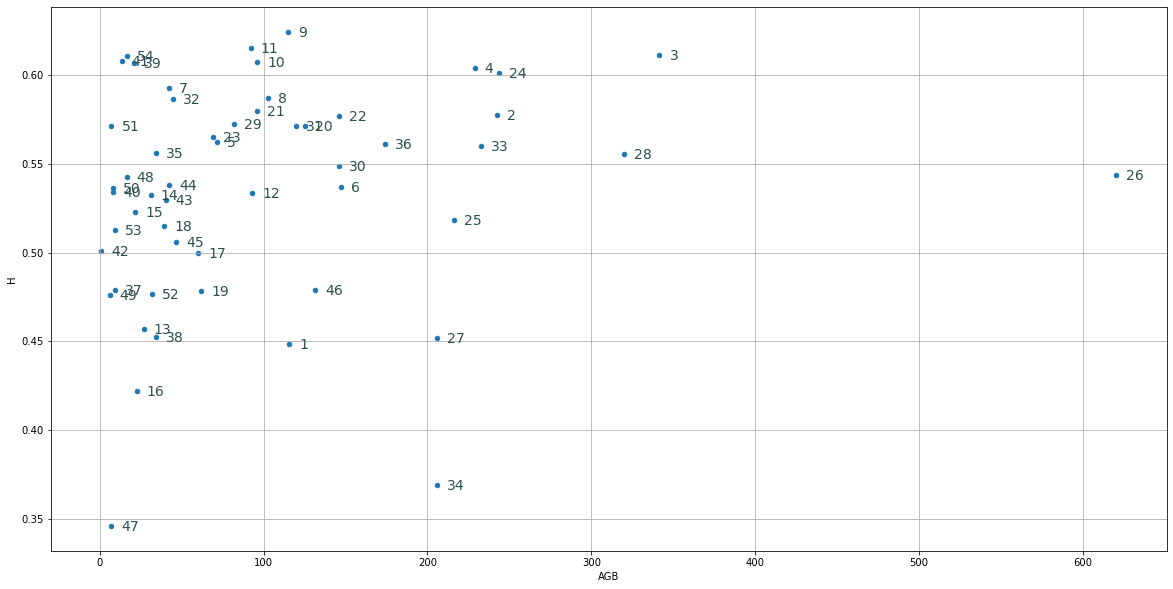

In [98]:
# Estudio intro polarimetrico

anotattedScatter(dataSAOCOM, 'AGB', 'H')

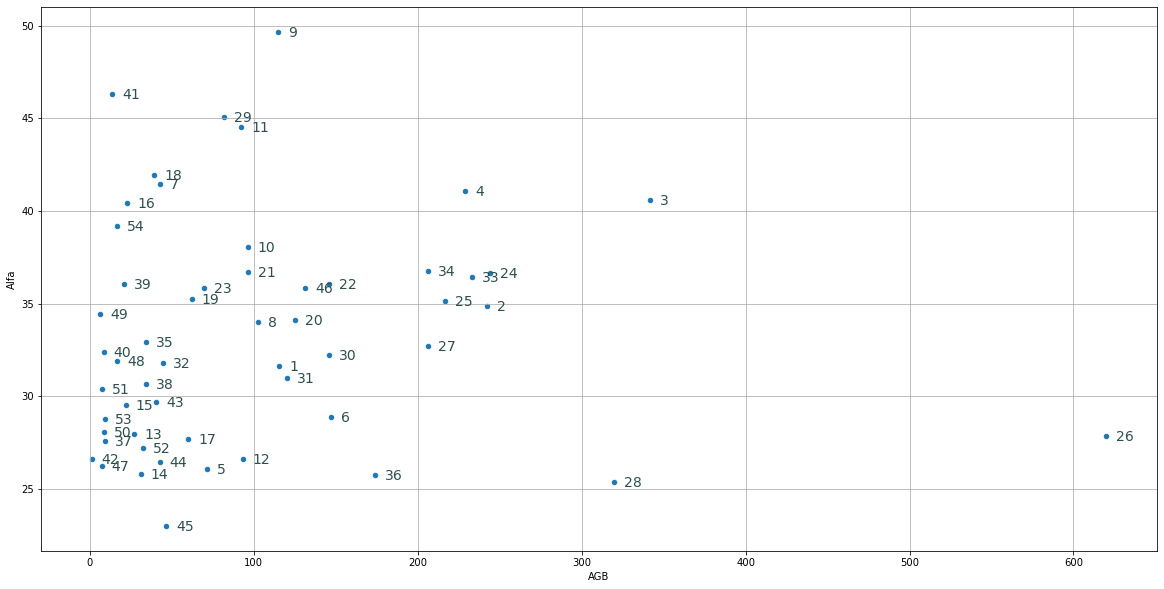

In [85]:
anotattedScatter(dataSAOCOM, 'AGB', 'Alfa')

# plt.scatter(dataSAOCOM['AGB'], dataSAOCOM['Alfa'])
# plt.ylim([0, 90])

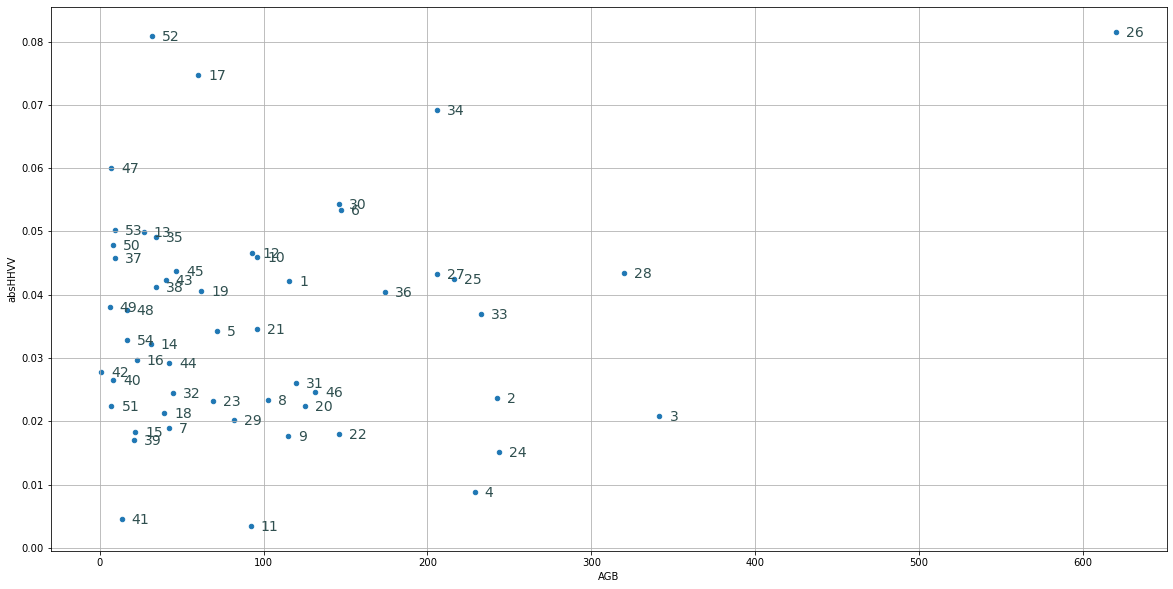

In [99]:
anotattedScatter(dataSAOCOM, 'AGB', 'absHHVV')

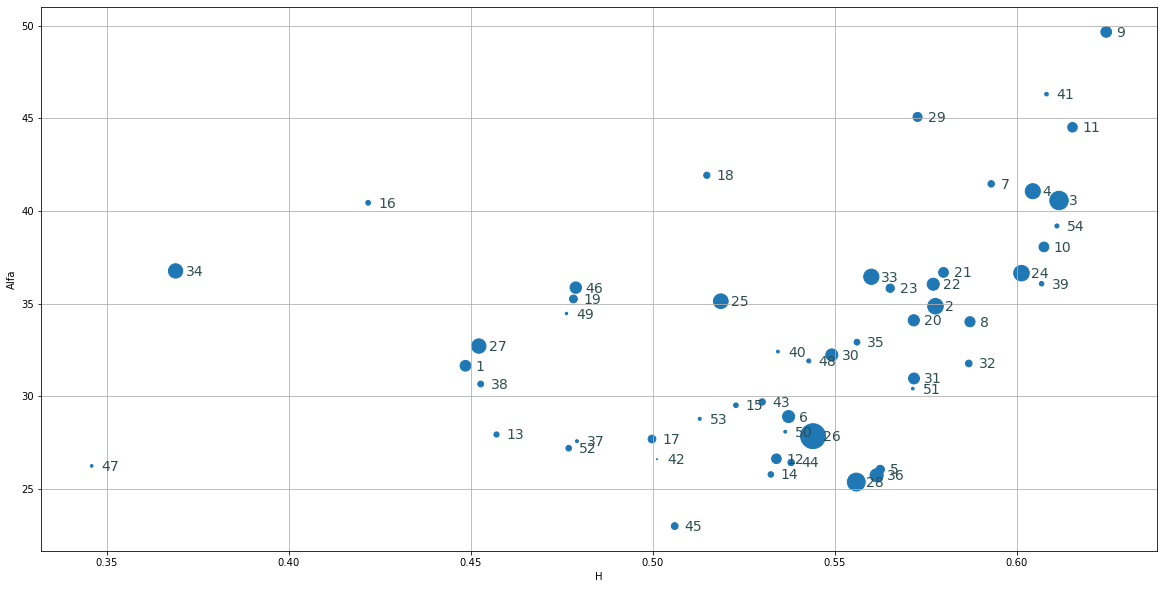

In [86]:
# anotattedScatter(dataSAOCOM, 'H', 'Alfa')


anotattedBubbleScatter(dataSAOCOM, 'H', 'Alfa', 'AGB')

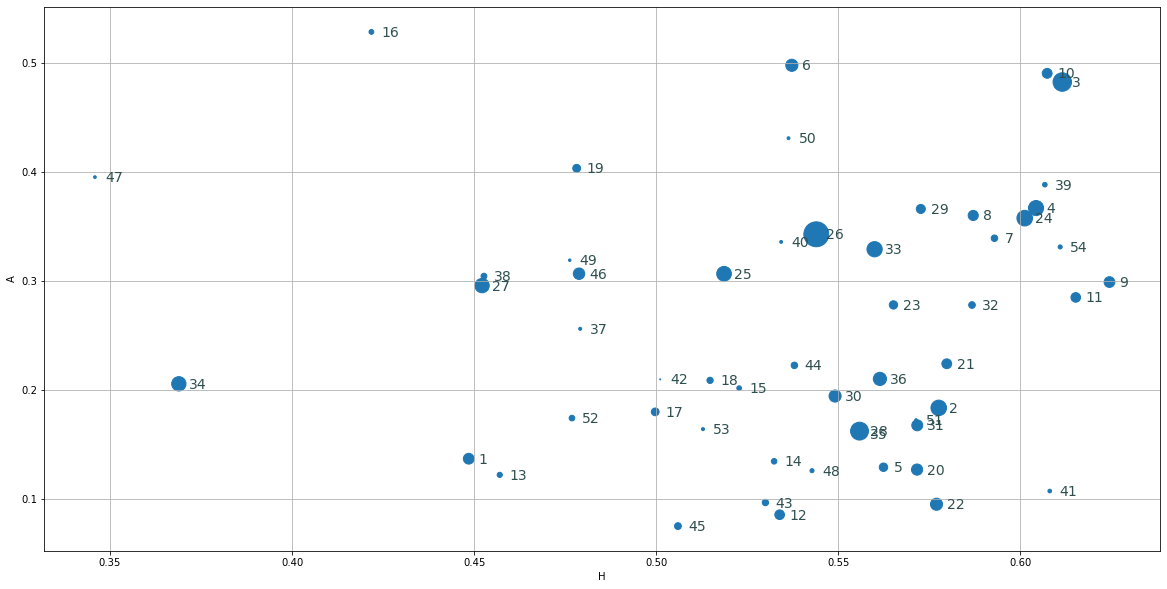

In [87]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'A', 'AGB')

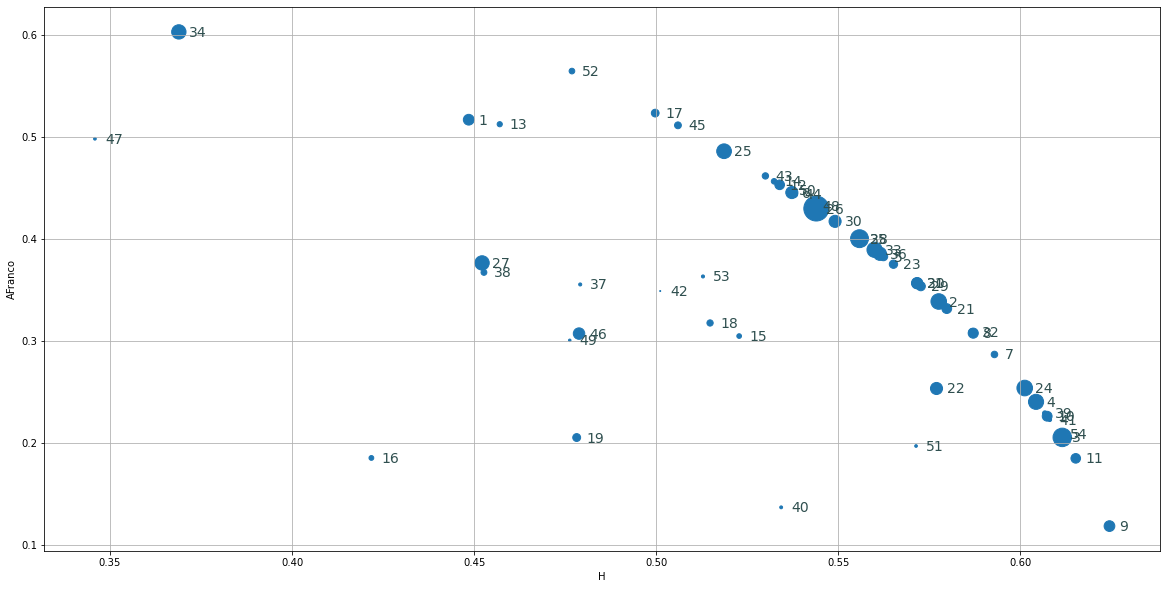

In [88]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'AFranco', 'AGB')

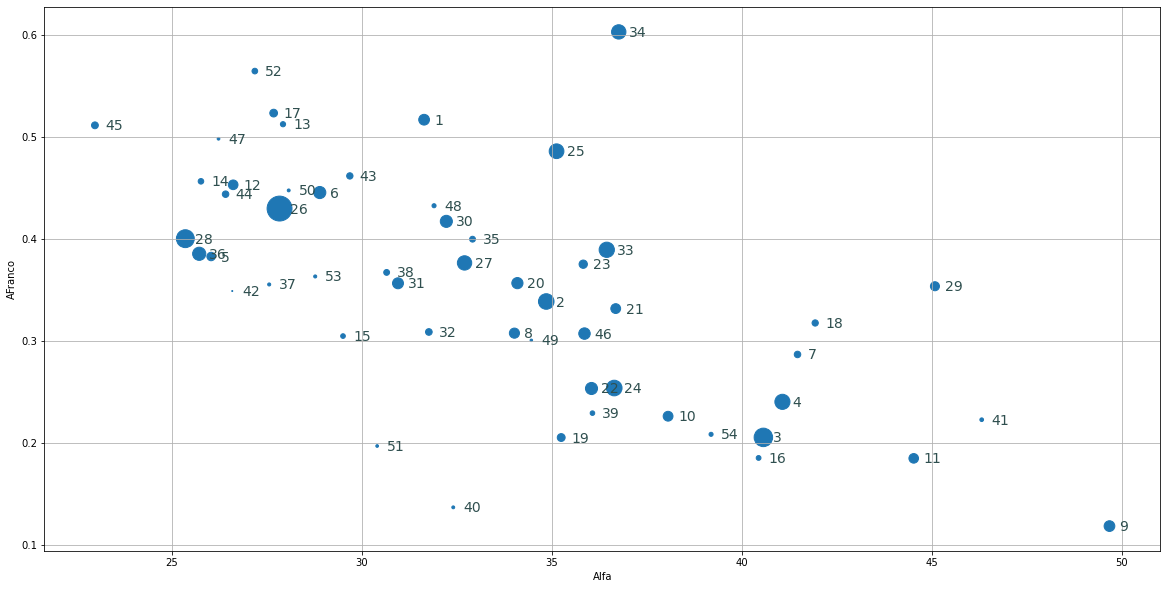

In [100]:
anotattedBubbleScatter(dataSAOCOM, 'Alfa', 'AFranco', 'AGB')

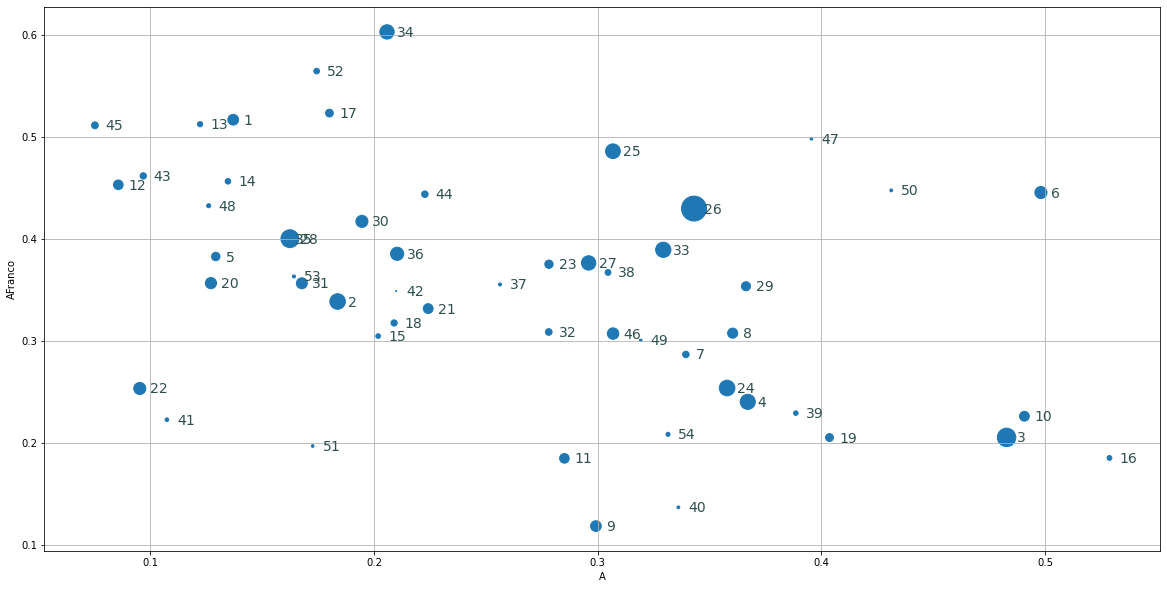

In [89]:
anotattedBubbleScatter(dataSAOCOM, 'A', 'AFranco', 'AGB')

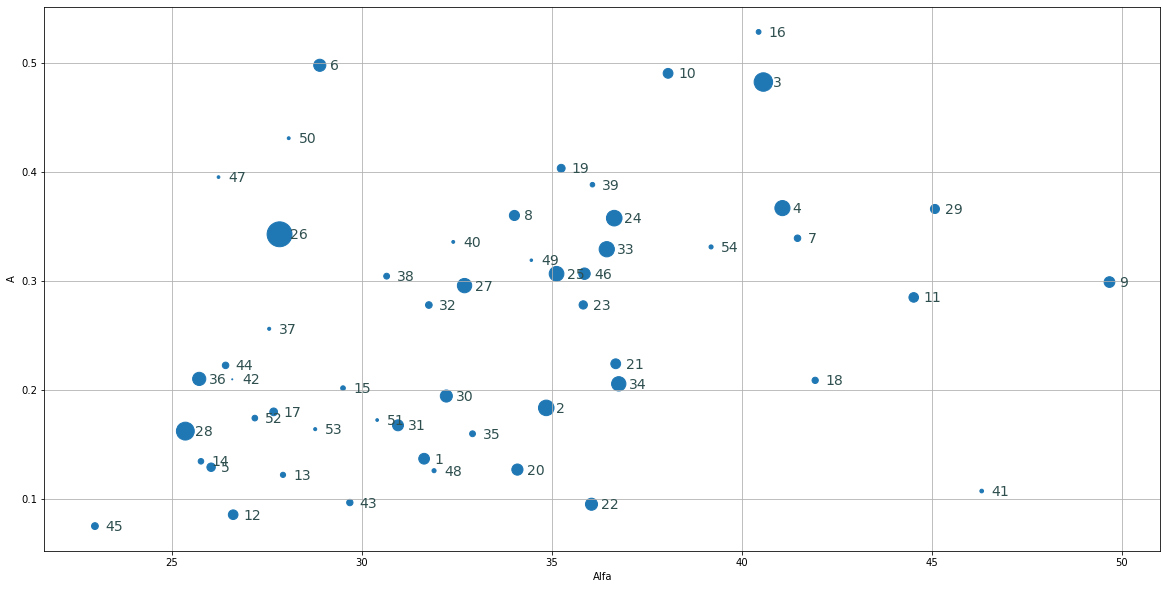

In [80]:
anotattedBubbleScatter(dataSAOCOM, 'Alfa', 'A', 'AGB')

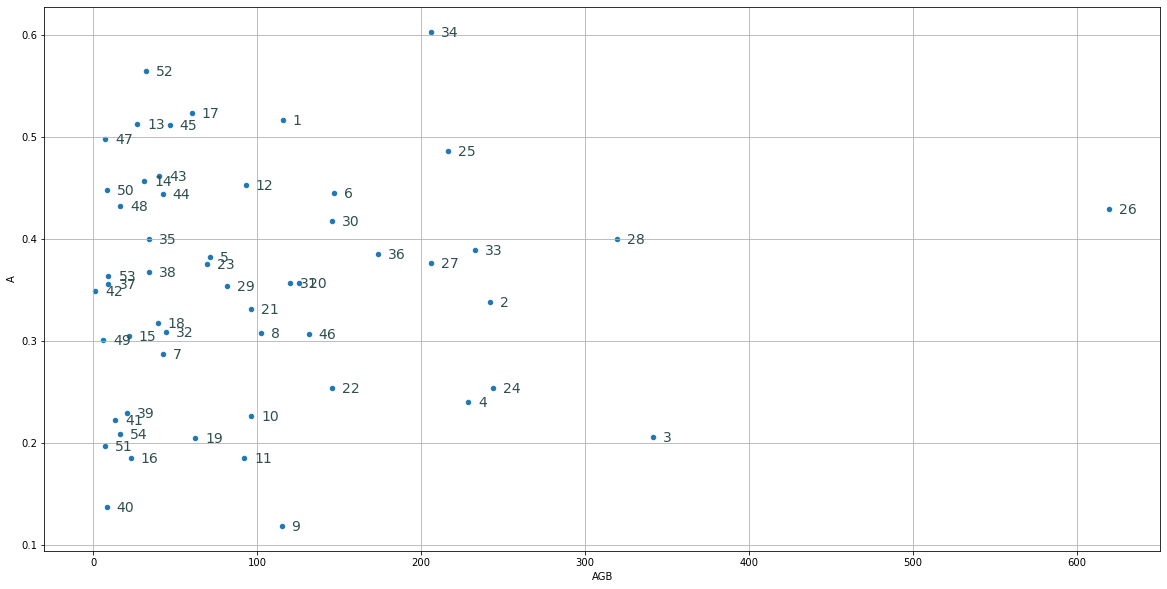

In [63]:
anotattedScatter(dataSAOCOM, 'AGB', 'A')

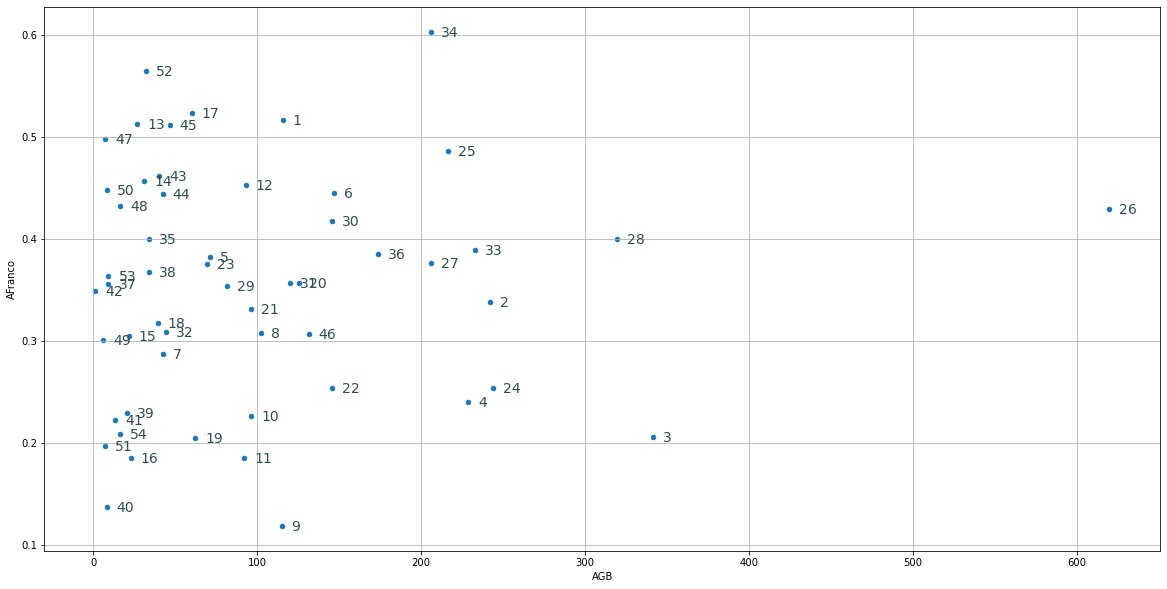

In [101]:
anotattedScatter(dataSAOCOM, 'AGB', 'AFranco')

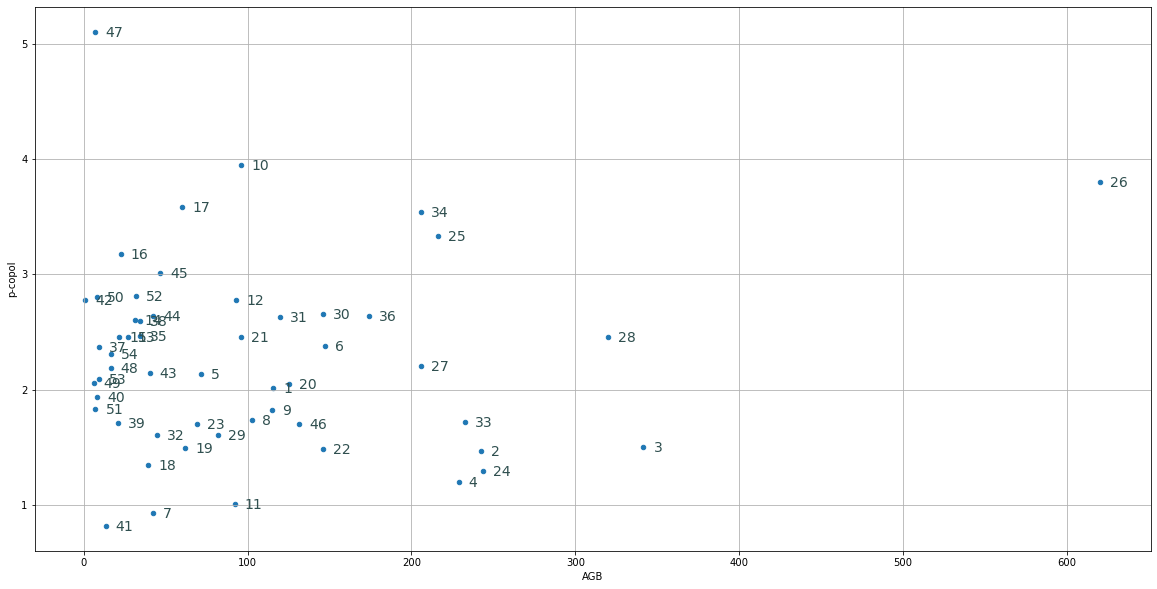

In [64]:
anotattedScatter(dataSAOCOM, 'AGB', 'p-copol')

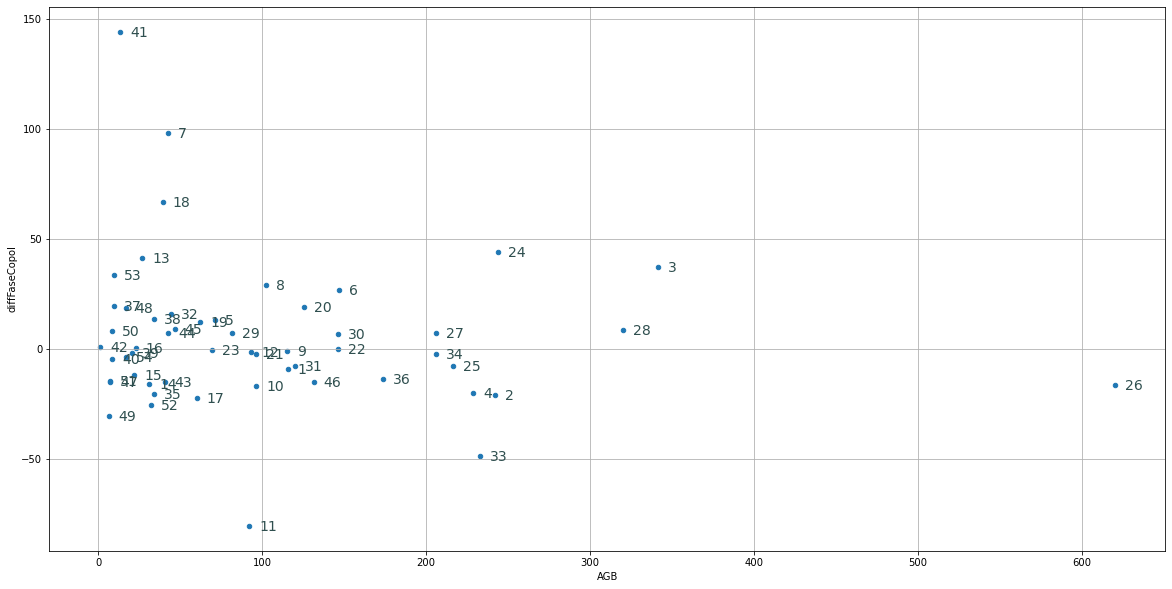

In [65]:
anotattedScatter(dataSAOCOM, 'AGB', 'diffFaseCopol')
# dataSAOCOM['diffFaseCopol']

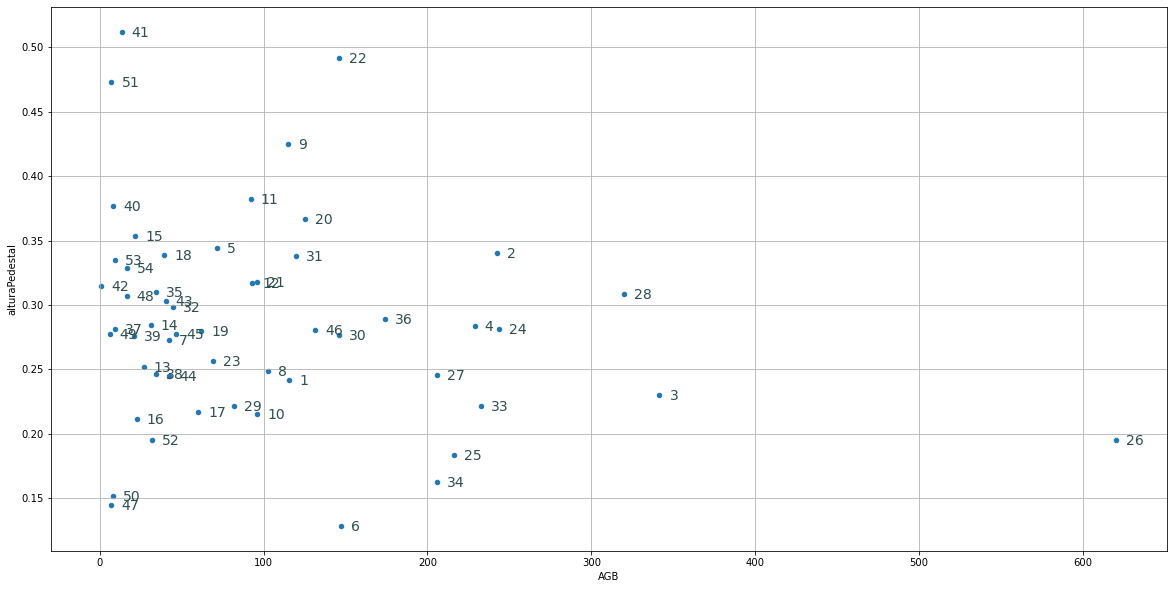

In [66]:
anotattedScatter(dataSAOCOM, 'AGB', 'alturaPedestal')

# dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
# dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
# dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
# dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

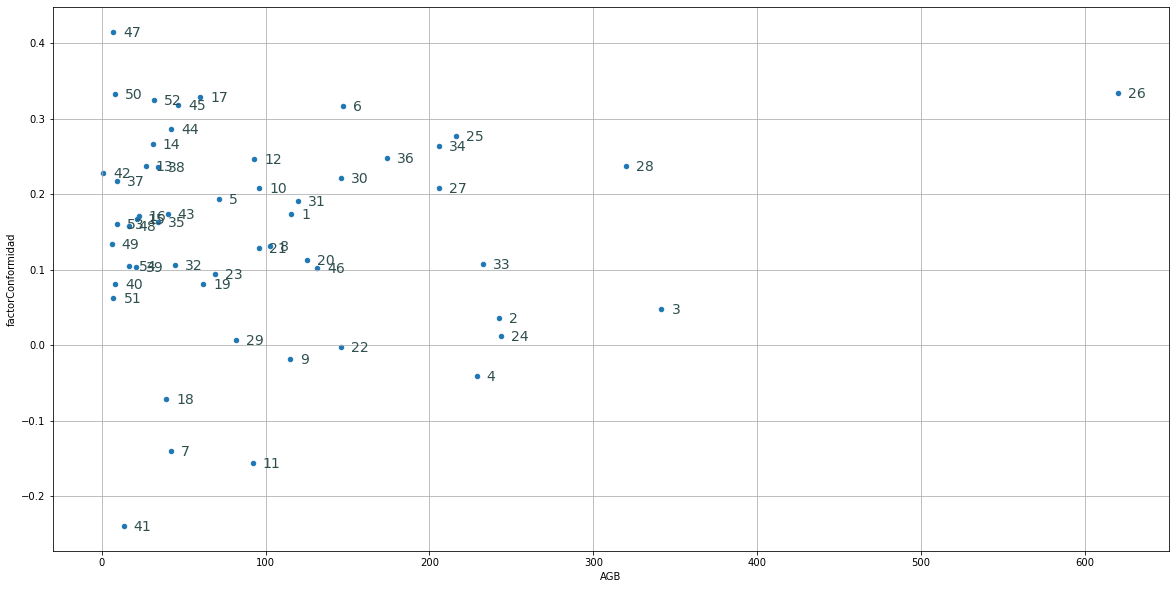

In [67]:
anotattedScatter(dataSAOCOM, 'AGB', 'factorConformidad')


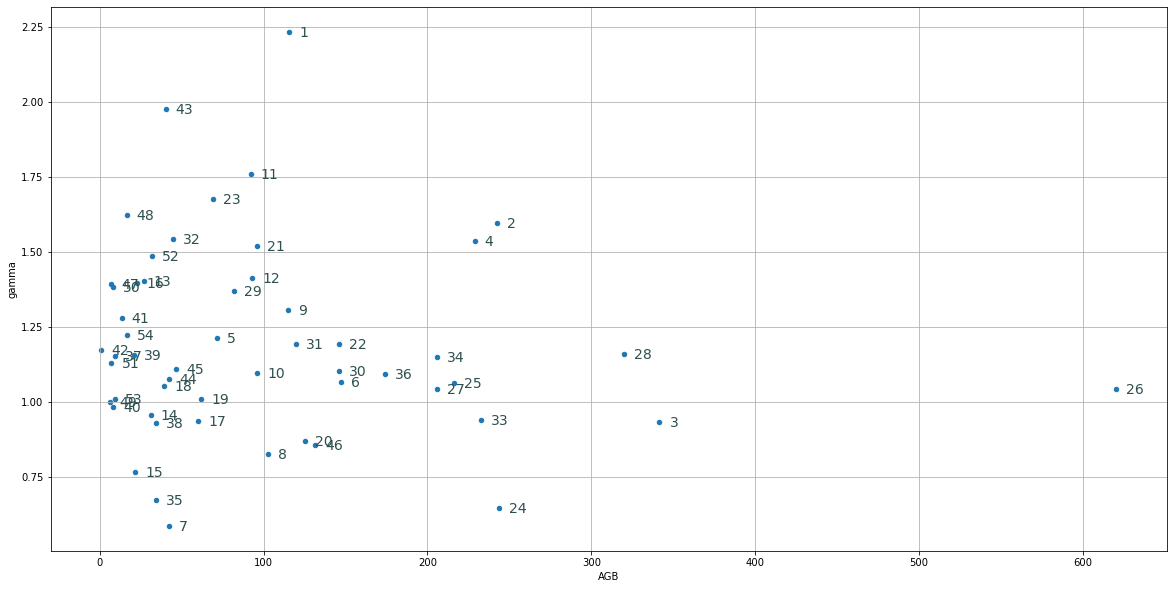

In [68]:
anotattedScatter(dataSAOCOM, 'AGB', 'gamma')

In [ ]:
# Inferencia

In [ ]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

In [ ]:
# prueba inferencia
# import pymc as pm

y = data_AGB.AGB.values
x_ = data_AGB.C11_dB.values

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    sigmaObs = pm.HalfNormal('sd', sigma=10)
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(3000, return_inferencedata=True)



In [ ]:
# plt.scatter(x,y)

In [ ]:
import arviz as az
az.plot_trace(trace, figsize=(10, 7));

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, "", label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")